In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_excel("Fuel_Consumption.xlsx")

In [29]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,CO2_Rating,Smog_Rating
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3
2,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2020,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2020,Acura,RDX AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [30]:
df.describe()

,Model_Year,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,CO2_Rating,Smog_Rating
count,878.0,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,2020.0,3.163895,5.658314,12.353531,9.073235,10.876310,27.715262,252.362187,4.542141,4.509112
std,0.0,1.361419,1.906448,3.385707,2.108181,2.771538,7.562496,59.483244,1.709835,1.749874
min,2020.0,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2020.0,2.000000,4.000000,10.000000,7.600000,9.000000,23.000000,210.000000,3.000000,3.000000
50%,2020.0,3.000000,6.000000,12.000000,8.800000,10.600000,27.000000,250.000000,4.000000,5.000000
75%,2020.0,3.800000,6.000000,14.400000,10.300000,12.500000,31.000000,290.000000,5.000000,6.000000
max,2020.0,8.000000,16.000000,26.800000,18.100000,22.200000,69.000000,522.000000,10.000000,7.000000


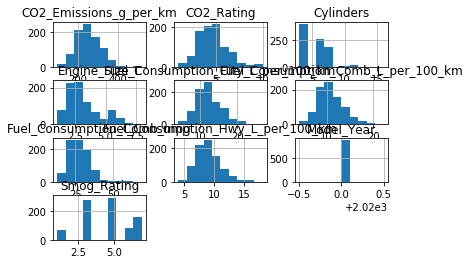

In [31]:
df.hist()
plt.show()

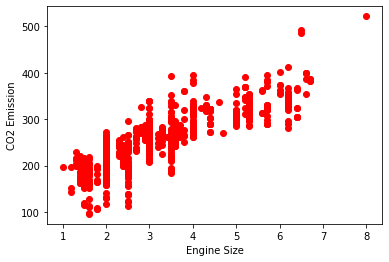

In [32]:
plt.scatter(df.Engine_Size_L , df.CO2_Emissions_g_per_km , color = "red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

# Train/Test Split

In [33]:
msk=np.random.rand(len(df)) <0.8
train=df[msk]
test=df[~msk]

# Model

In [103]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x_train=np.asanyarray(train[["Engine_Size_L"]])
y_train=np.asanyarray(train[["CO2_Emissions_g_per_km"]])

x_test=np.asanyarray(test[["Engine_Size_L"]])
y_test=np.asanyarray(test[["CO2_Emissions_g_per_km"]])

poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
print(x_train_poly)

[[ 1.    2.4   5.76]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]
 ...
 [ 1.    2.    4.  ]
 [ 1.    2.    4.  ]
 [ 1.    2.    4.  ]]


# x1 = 1 , x2 = x , x3 = X^2 , So now we can solve it by Linear Regression 

In [104]:
# Polynomial Regression is the special case of linear Regression

regr=linear_model.LinearRegression()
regr.fit(x_train_poly, y_train)
print("Coefficient - ",regr.coef_)
print("Intercept - ",regr.intercept_ )

Coefficient -  [[ 0.         60.92472271 -3.30669878]]
Intercept -  [100.00425284]


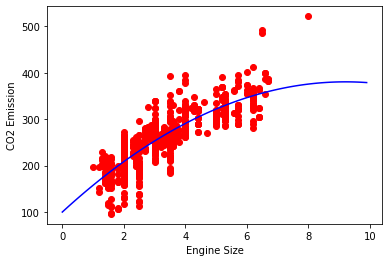

In [109]:
plt.scatter(df.Engine_Size_L , df.CO2_Emissions_g_per_km , color = "red")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX , yy , color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()